# Natural Languaje Processing / Natural Languaje Understanding

Reviews analysis from Yelp database.

Access the dataset: https://drive.google.com/file/d/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE/view?usp=sharing:

In [ ]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE' -O reviews.csv

In [ ]:
# Install needed libraries
!pip install transformers
!pip install sentence_transformers
!pip install keybert
!pip install bertopic

In [52]:
# Imports
import pandas as pd
from textblob import TextBlob
import numpy as np
from wordcloud import WordCloud
from bertopic import BERTopic
import matplotlib.pyplot as plt
import seaborn as sns
from keybert import KeyBERT
import spacy

# Exploratory Data Analysis

In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv("reviews.csv")
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


In [2]:
df.columns

Index(['user_id', 'review_id', 'text', 'votes.cool', 'business_id',
       'votes.funny', 'stars', 'date', 'type', 'votes.useful'],
      dtype='object')

In [3]:
df.isna().sum() / df.shape[0]

user_id         0.0
review_id       0.0
text            0.0
votes.cool      0.0
business_id     0.0
votes.funny     0.0
stars           0.0
date            0.0
type            0.0
votes.useful    0.0
dtype: float64

    It is seems to be no missing data in the dataset.

## Variables:

* Customer identifier variable: 'user_id'.
* Comment identifier variable: 'review_id'.
* Comment: 'text'.
* Voting related variables: 'votes.cool', 'votes.funny' and 'votes.useful'. 

  A priori there seems to be no missing values, what I suspect from the head is that the variables related to the voting surely have many null values, we would have to analyze the amount of them that are present in percentage and based on this determine if the value is really null or what happened is that the customer did not vote and the value that was placed by default was null. 
    
* Business identifier variable: 'business_id'.
* Score given by the customer: 'stars'.
* Type of comment: 'type'.
* Date: 'date'.

In [4]:
(df["type"].value_counts()/df.shape[0])*100

review    100.0
Name: type, dtype: float64

There is no variability in the variable type, they are all reviews, I could not use it since it has no variance. 

In [5]:
(df["votes.cool"].value_counts()/df.shape[0])*100

0     78.138512
1     14.705020
2      3.755955
3      1.487724
4      0.787834
5      0.307805
6      0.278490
8      0.113595
7      0.102602
9      0.065958
10     0.054965
11     0.032979
15     0.032979
13     0.032979
12     0.025650
14     0.021986
17     0.014657
18     0.010993
51     0.003664
29     0.003664
49     0.003664
61     0.003664
16     0.003664
30     0.003664
33     0.003664
19     0.003664
Name: votes.cool, dtype: float64

In [6]:
(df["votes.useful"].value_counts()/df.shape[0])*100

0     58.816416
1     22.887505
2      9.289117
3      4.173690
4      1.854159
5      1.161598
6      0.630267
7      0.333455
8      0.252840
10     0.172224
9      0.106266
11     0.076951
12     0.051301
14     0.032979
16     0.029315
15     0.029315
13     0.029315
20     0.010993
17     0.010993
19     0.010993
21     0.007329
18     0.007329
23     0.007329
52     0.003664
36     0.003664
39     0.003664
32     0.003664
33     0.003664
Name: votes.useful, dtype: float64

In [7]:
(df["votes.funny"].value_counts()/df.shape[0])*100

0     82.766581
1     11.128619
2      3.275925
3      1.102968
4      0.663247
5      0.318798
6      0.238182
7      0.150238
8      0.120923
9      0.051301
11     0.032979
10     0.032979
12     0.029315
13     0.021986
14     0.010993
16     0.010993
18     0.007329
15     0.003664
52     0.003664
44     0.003664
30     0.003664
32     0.003664
17     0.003664
20     0.003664
27     0.003664
21     0.003664
19     0.003664
Name: votes.funny, dtype: float64

It is determined that:
* In the variable "votes.cool": 78% of the values are 0.
* In the variable "votes.useful": 59% of the values are 0.
* In the variable "votes.funny": 82% of the values are 0. 

In [10]:
print("Number of users:",df['user_id'].nunique())
print("Number of reviews:",df['review_id'].nunique())
print("Number of buisness:",df['business_id'].nunique())

Number of users: 14861
Number of reviews: 27290
Number of buisness: 1320


  Interesting to see that the number of comments is greater than the number of customers, i.e. there are customers who made multiple comments, also in the dataset we have the date, this would open the door to analyze how is the evolution of the opinion of the clientele for a particular business. 
    
  That is to say that from the data can be extracted, the experiences that customers had (good or bad) over time and based on this, determine how many and which ones went back to the store and know if their experience after visiting it again was better or worse than the first, for different businesses. 

In [6]:
groupped=df.groupby('business_id', as_index=False).agg({"stars": "mean"}).sort_values(by='stars',ascending=False)
print("Restaurants with 5 stars:",len(groupped[groupped["stars"]==5]))
print("Restaurants with between 4 y 5 stars:",len(groupped[(groupped["stars"]>=4)&(groupped["stars"]<5)]))
print("Restaurants with between 3 y 4 stars:",len(groupped[(groupped["stars"]>=3)&(groupped["stars"]<4)]))
print("Restaurants with between 2 y 3 stars:",len(groupped[(groupped["stars"]>=2)&(groupped["stars"]<3)]))
print("Restaurants with between 0 y 2 stars:",len(groupped[(groupped["stars"]>=0)&(groupped["stars"]<2)]))

Restaurants with 5 stars: 71
Restaurants with between 4 y 5 stars: 374
Restaurants with between 3 y 4 stars: 522
Restaurants with between 2 y 3 stars: 274
Restaurants with between 0 y 2 stars: 79


We can see that average restaurants predominate, by this I mean restaurants where the stars that value them are between 3 and 5, also the number of them that exceed 5 stars is equal to the number of them that are mediocre (0 to 2 stars).

Some 5 star restaurants:

In [10]:
groupped[groupped["stars"]==5].head(5)

,business_id,stars
1189,tbNSGiIKysRn3HE2lEAE7g,5.0
1257,xMekAmDsCdhk21Buf9ucSQ,5.0
355,G35Hz7qpBKqrOiDevcfh7A,5.0
94,2ogxlmNxcE4yTJt9BAH8wQ,5.0
170,6AdkKhsXnSdSFICAPVfrlQ,5.0


In [74]:
grouped_df=df.groupby('business_id', as_index=False).agg({"stars": "mean",
                                              "type": "count"}).sort_values(by='type',ascending=False)
grouped_df.columns = ["Buisness ID",'Mean Stars', 'Quantity of reviews']
display(grouped_df.head())

,Buisness ID,Mean Stars,Quantity of reviews
106,3Q0QQPnHcJuX1DLCL9G9Cg,3.463483,1068
1052,mpDxBBGywUE6GRRKja3sBA,3.772296,527
514,NeUf9FyCCIN4MEseNyqkXQ,3.379845,387
979,jTGQUWGIVvL-aY03C5BEmw,3.928082,292
511,NTfUFk8GyOLL1uPbEO-pVg,3.884000,250


For the examples in which it is necessary to make some calculation by business I will take the business 3Q0QQQPnHcJuX1DLCL9G9Cg that is the one that has more reviews. 

**Observing some comments**

In [7]:
df['text'].sort_values()

21528    !!AMAZING RESTAURANT!!\n\nI have got to buy a ...
24321    "A Miracle on the Hudson..."\n\nI absolutely L...
22768    "A very flavorful New Orleans' experience with...
19720    "A woman is a woman but a good cigar is always...
13936    "Alright you bunch of booze bags, go home."  I...
                               ...                        
14006    you must come here, and you may even want to d...
17501    yumm yumm yumm... Rock Bottom has some great f...
18272    yumm!!! love the fried chicken, corn bread and...
11500    yummy, yummy chinese food.  thank heavens for ...
24088    シャーロット国際空港\n\n綺麗な空港で色々な方面へのハブとして便利\n\nアメリカの東西の...
Name: text, Length: 27290, dtype: object

**Tipos de dato que contiene el dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       27290 non-null  object
 1   review_id     27290 non-null  object
 2   text          27290 non-null  object
 3   votes.cool    27290 non-null  int64 
 4   business_id   27290 non-null  object
 5   votes.funny   27290 non-null  int64 
 6   stars         27290 non-null  int64 
 7   date          27290 non-null  object
 8   type          27290 non-null  object
 9   votes.useful  27290 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


# First stage

I am going to analize the complete dataset without filtering it. In the seccond approach I am going to filter it. 

# Preprocessing

In [12]:
# Cargar el lenguaje
nlp = spacy.load("en_core_web_sm")

### Remove stop words, punctuation marks and move everything to lowercase and lemmanice:

In [13]:
def clean_text(text):
    clean_text = []
    for token in nlp(text):
        if not token.is_stop and not token.is_punct:
            clean_text.append(token.lemma_.lower())
    return " ".join(clean_text)

In [14]:
example_string = "Martin is a very happy Guy and he likes ice cream!"
print(clean_text(example_string))

martin happy guy like ice cream


In [15]:
df["text_clean"] = df["text"].apply(clean_text)

In [16]:
df["text_clean"].head(5)

0    mr hoagie institution walk like throwback 30 y...
1    excellent food superb customer service miss ma...
2    yes place little date open weekend staff pleas...
3    food great good thing wing wing simply fantast...
4    check place past monday wing night hear wing g...
Name: text_clean, dtype: object

## Keywords and topics by business (business id)

In [18]:
kw_model = KeyBERT()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [19]:
%%time
df["KEYWORDS"] = df.text_clean.apply(lambda x: kw_model.extract_keywords(x, top_n=5, keyphrase_ngram_range=(1,1)))

CPU times: user 13min 13s, sys: 10min 21s, total: 23min 34s
Wall time: 12min 10s


In [20]:
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

### Keywords for the entire database:

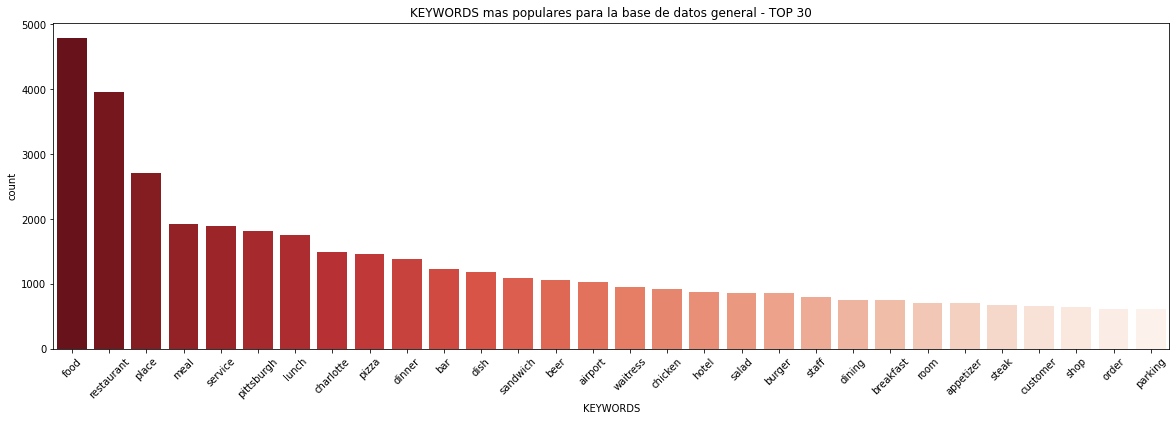

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x=df.explode("KEYWORDS").KEYWORDS, 
              order=df.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS mas populares para la base de datos general - TOP 30")
plt.xticks(rotation=45)
plt.show()

From the results obtained it can be seen that this is clearly a dataset related to gastronomy. 

#### Keyword analysis for business 3Q0QQQPnHcJuX1DLCL9G9Cg

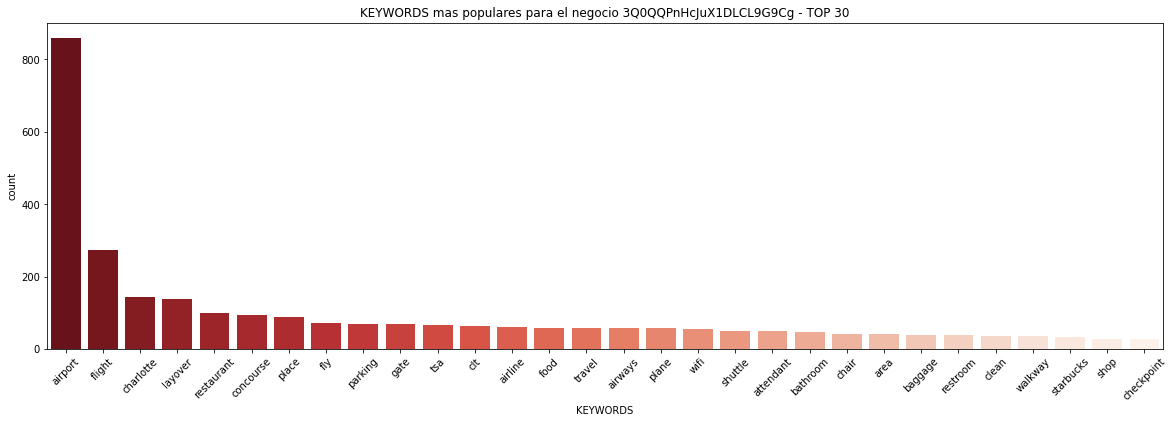

In [22]:
negocio = df[df["business_id"]=="3Q0QQPnHcJuX1DLCL9G9Cg"]

plt.figure(figsize=(20,6))
sns.countplot(x=negocio.explode("KEYWORDS").KEYWORDS, 
              order=negocio.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS mas populares para el negocio 3Q0QQPnHcJuX1DLCL9G9Cg - TOP 30")
plt.xticks(rotation=45)
plt.show()

We can see that the most mentioned words in this business are highly linked to the topic of airplanes, travel, airports, flights. So we can infer that the business is located near or inside an airport. It seems that no keyword related to any food or special dish they serve can be found. So it is concluded that it is a restaurant or business that provides many amenities rather than good food dishes.  

In [23]:
# Guardo el dataframe procesado hasta ahora para trabajar mas tarde:
# df.to_csv('datos_keywords.csv')
# df = pd.read_csv('/datos_keywords.csv', index_col=0)
# df.head(5)

### General topics for all data:

In [24]:
%time
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["text_clean"].values)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


Batches:   0%|          | 0/853 [00:00<?, ?it/s]

2022-09-18 20:58:25,202 - BERTopic - Transformed documents to Embeddings
2022-09-18 20:59:13,006 - BERTopic - Reduced dimensionality
2022-09-18 20:59:58,967 - BERTopic - Clustered reduced embeddings


In [25]:
topics_data = topic_model.get_topic_info()

In [26]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
# df.head(3)

In [27]:
# topic_model.visualize_topics()

In [28]:
# df = df.iloc[: , :-2]
# df.head(1)

In [29]:
topic_keywords = df.explode("KEYWORDS").groupby(["TOPIC_ID"]).agg({"KEYWORDS": pd.Series.mode})
topic_keywords = topic_keywords.rename(columns={"KEYWORDS": "TOPIC_MOST_FREQ_KEYWORD"})
df = df.merge(topic_keywords, how='left', on="TOPIC_ID")
# df.head()

In [30]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 600,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df["TOPIC_MOST_FREQ_KEYWORD"].values))

We plotted the most frequent keywords in each of the topics found.

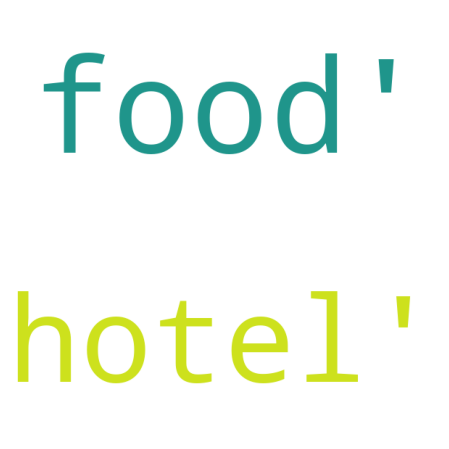

In [31]:
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

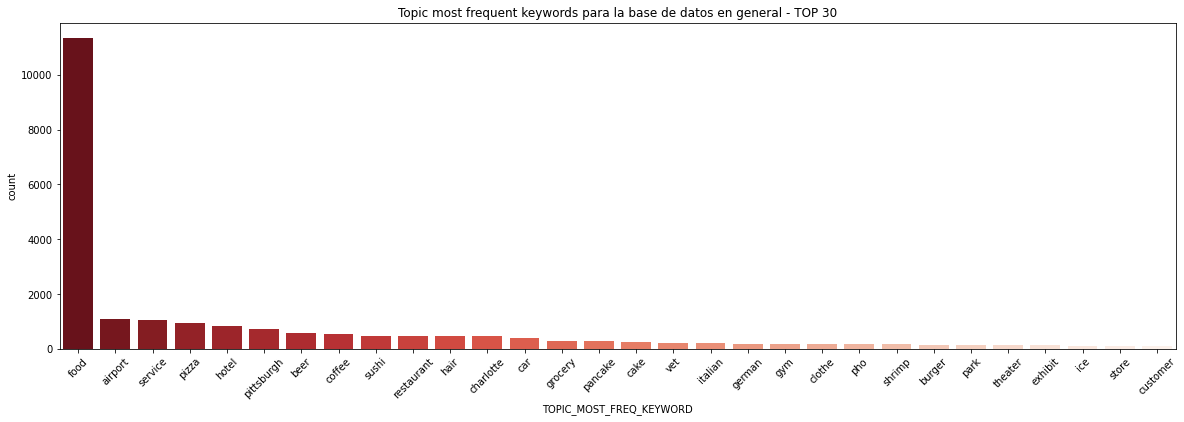

In [32]:
plt.figure(figsize=(20,6))
sns.countplot(x=df.explode("TOPIC_MOST_FREQ_KEYWORD").TOPIC_MOST_FREQ_KEYWORD, 
              order=df.explode("TOPIC_MOST_FREQ_KEYWORD").TOPIC_MOST_FREQ_KEYWORD.value_counts().index[:30],
              palette='Reds_r')
plt.title("Topic most frequent keywords para la base de datos en general - TOP 30")
plt.xticks(rotation=45)
plt.show()

### Topical display for particular business:

In [33]:
negocio = df[df["business_id"]=="3Q0QQPnHcJuX1DLCL9G9Cg"]
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(negocio["text_clean"].values)
# topic_model.visualize_topics()

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

2022-09-18 21:00:03,703 - BERTopic - Transformed documents to Embeddings
2022-09-18 21:00:11,641 - BERTopic - Reduced dimensionality
2022-09-18 21:00:11,727 - BERTopic - Clustered reduced embeddings


For the business under analysis, we plotted the most frequent keywords in the topics found for it.

In [34]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 600,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(negocio["TOPIC_MOST_FREQ_KEYWORD"].values))

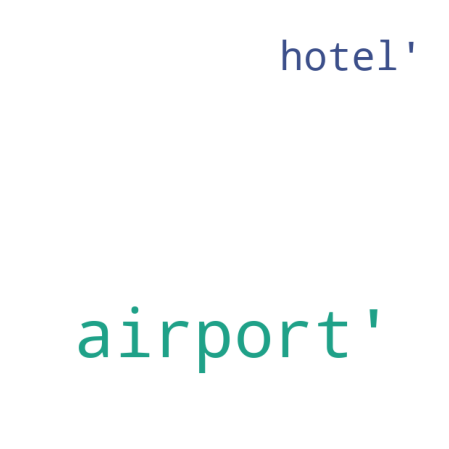

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

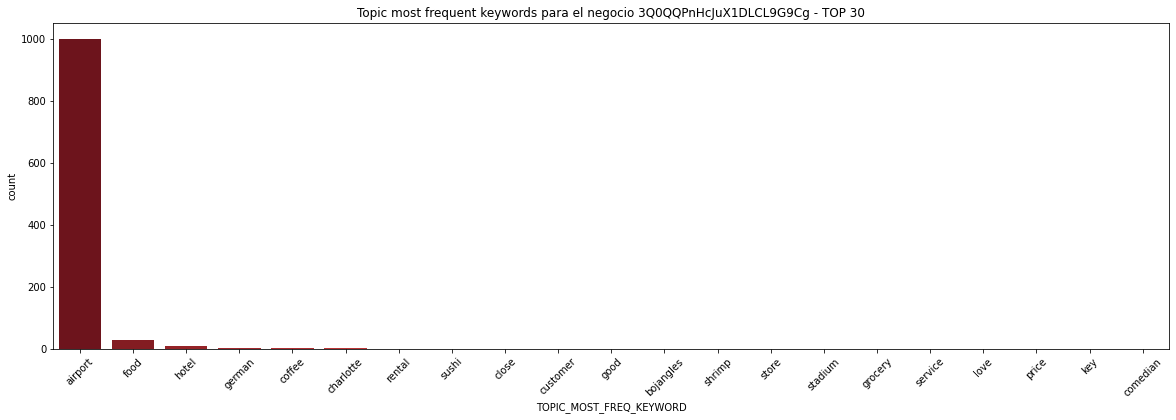

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(x=negocio.explode("TOPIC_MOST_FREQ_KEYWORD").TOPIC_MOST_FREQ_KEYWORD, 
              order=negocio.explode("TOPIC_MOST_FREQ_KEYWORD").TOPIC_MOST_FREQ_KEYWORD.value_counts().index[:30],
              palette='Reds_r')
plt.title("Topic most frequent keywords para el negocio 3Q0QQPnHcJuX1DLCL9G9Cg - TOP 30")
plt.xticks(rotation=45)
plt.show()

We can see how they are consistent with the results previously obtained. 

## Sentiment of each review
  To perform the sentiment analysis we used the TextBlob tool.

In [37]:
df["sentiment_score"] = df["text_clean"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
                           ['neg', 'neu', 'pos'])

In [38]:
df.head(1)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,TOPIC_MOST_FREQ_KEYWORD,sentiment_score,sentiment
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[subway, hoagie, burger, food, menu]",-1,10298,-1_food_good_place_order,food,0.196032,pos


In [39]:
df.sentiment.value_counts()

pos    23447
neg     3477
neu      366
Name: sentiment, dtype: int64

In [40]:
df.sentiment.value_counts("%")

pos    0.859179
neg    0.127409
neu    0.013412
Name: sentiment, dtype: float64

[Text(0, 0, 'positive'), Text(0, 0, 'negative'), Text(0, 0, 'neutral')]

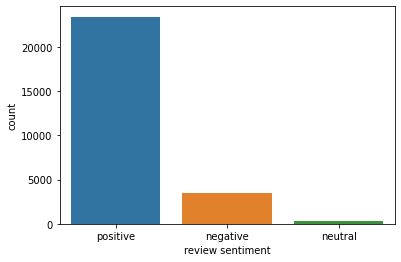

In [41]:
# Plot the distribution
class_names = ['positive',"negative",'neutral']
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)

We can see that the highest percentage and notably the majority of the data are positive sentiments, followed by comments with negative sentiments but in a notably lower percentage and finally the neutral ones. 

In [42]:
positive = df[df["sentiment"]=="pos"]
negative = df[df["sentiment"]=="neg"]
neutral = df[df["sentiment"]=="neu"]

In [43]:
positive.head(1)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,TOPIC_MOST_FREQ_KEYWORD,sentiment_score,sentiment
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[subway, hoagie, burger, food, menu]",-1,10298,-1_food_good_place_order,food,0.196032,pos


Voy a analizar keywords mas comunes en cada uno de los sentimientos determinados. 

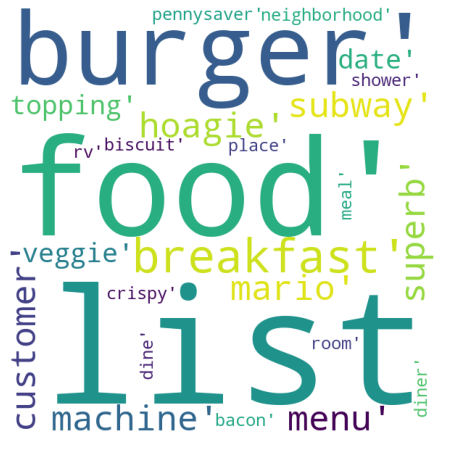

In [44]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 600,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(positive["KEYWORDS"].values))
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

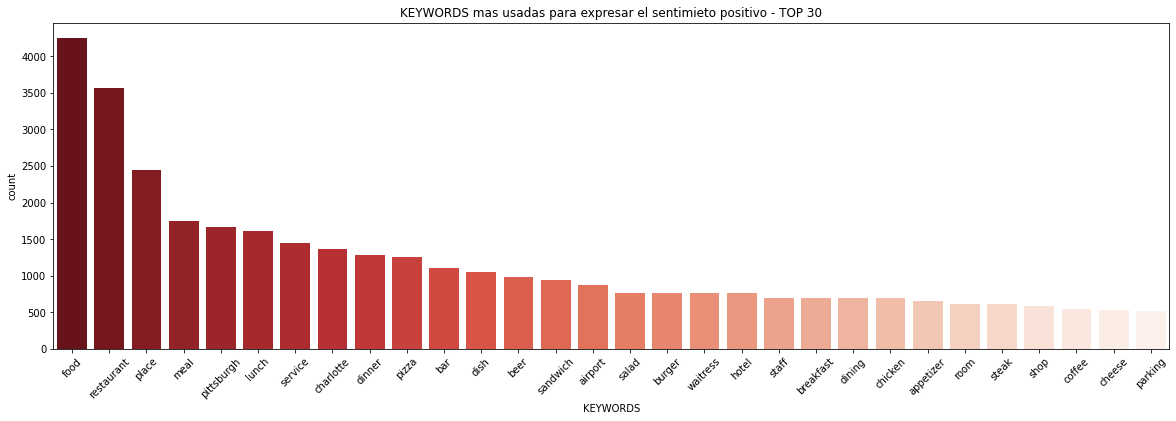

In [45]:
plt.figure(figsize=(20,6))
sns.countplot(x=positive.explode("KEYWORDS").KEYWORDS, 
              order=positive.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS mas usadas para expresar el sentimieto positivo - TOP 30")
plt.xticks(rotation=45)
plt.show()

When people talk about food and what they would like to eat, the algorithm relates it to positive feelings. 

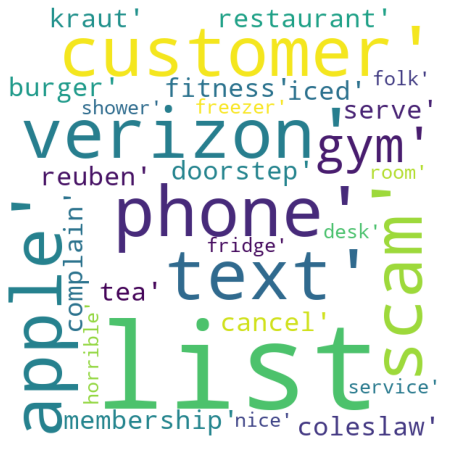

In [46]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 600,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(negative["KEYWORDS"].values))
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

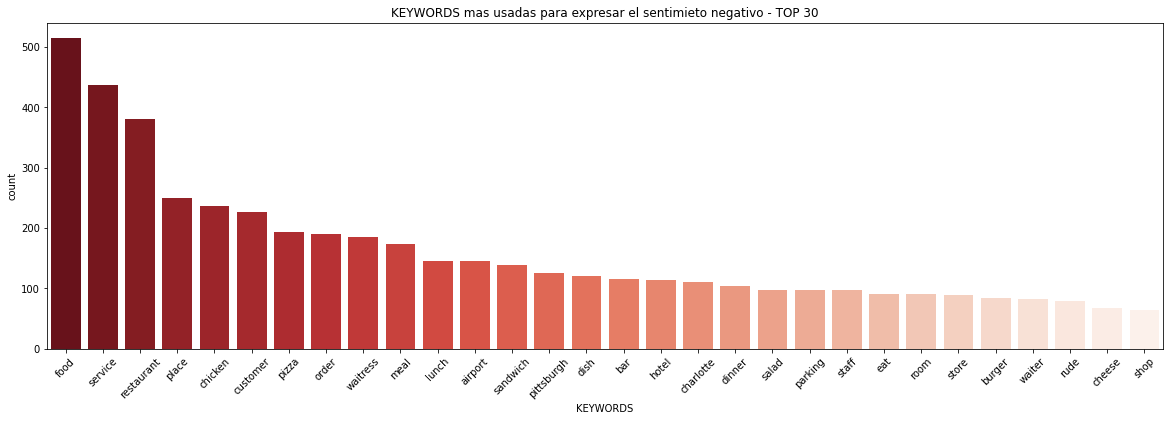

In [47]:
plt.figure(figsize=(20,6))
sns.countplot(x=negative.explode("KEYWORDS").KEYWORDS, 
              order=negative.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS mas usadas para expresar el sentimieto negativo - TOP 30")
plt.xticks(rotation=45)
plt.show()

When people talk about exercise or something related to it, the algorithm relates it to negative feelings. 
In addition, words such as phone and text are linked, which refer to media or communication channels. 
We also see the word customer which could refer to complaints related to what the customer asked for.
We also see clear words that express negative feelings such as horrible, complain, among others. 

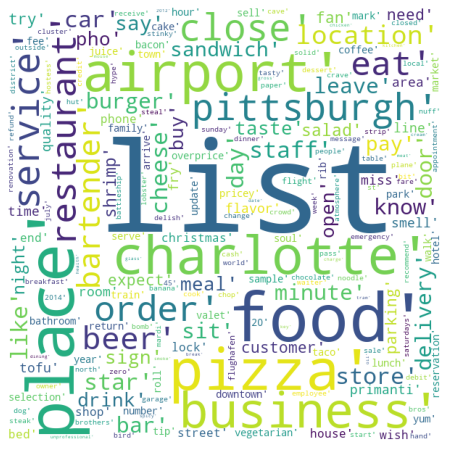

In [48]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 600,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(neutral["KEYWORDS"].values))
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

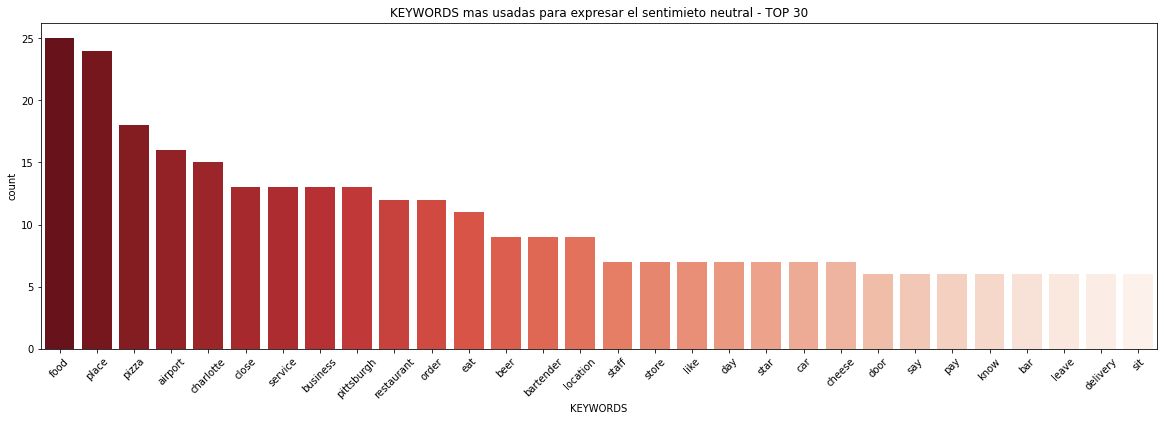

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(x=neutral.explode("KEYWORDS").KEYWORDS, 
              order=neutral.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS mas usadas para expresar el sentimieto neutral - TOP 30")
plt.xticks(rotation=45)
plt.show()

These are words that have not been linked to any feelings. 

## Entities by review

In [50]:
#COMPLETAR
def get_entities(text):
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
  return ents

In [51]:
#COMPLETAR
df["NER"] = df["text_clean"].apply(get_entities)
df.head(5)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,TOPIC_MOST_FREQ_KEYWORD,sentiment_score,sentiment,NER
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[subway, hoagie, burger, food, menu]",-1,10298,-1_food_good_place_order,food,0.196032,pos,"[30 year ago old, 70, italian, year year, patty]"
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0,excellent food superb customer service miss ma...,"[mario, machine, food, customer, superb]",-1,10298,-1_food_good_place_order,food,0.933333,pos,[]
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0,yes place little date open weekend staff pleas...,"[food, topping, date, veggie, pennysaver]",-1,10298,-1_food_good_place_order,food,0.322553,pos,"[weekend, daily]"
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0,food great good thing wing wing simply fantast...,"[wing, bar, dining, yinzer, pittsburgh]",-1,10298,-1_food_good_place_order,food,0.493182,pos,"[night, monday, wednesday, 0.75]"
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0,check place past monday wing night hear wing g...,"[wing, menu, flavor, crispy, boat]",135,21,135_wing_cannoli_sauce_garlic,wing,0.039394,pos,"[past monday, night]"


We analyzed for the most frequently encountered entities

In [52]:
df_exploded = df.explode("NER")

In [53]:
# df_exploded.head(5)

In [54]:
# df_exploded.groupby(by="NER").agg({"NER": "count"}).sort_values(by='NER',ascending=False).head(10)
# count().sort_values(by="text", ascending = False).head(20)
df_exploded.groupby(by="NER").count().sort_values(by="type", ascending = False).head(20)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,TOPIC_MOST_FREQ_KEYWORD,sentiment_score,sentiment
NER,,,,,,,,,,,,,,,,,,
italian,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488,1488
2,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312
5,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194
3,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096
second,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965
4,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915
night,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888
half,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744
chinese,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718


These are the most frequent entities encountered.

In [55]:
# Guardo el dataframe procesado hasta ahora para trabajar mas tarde:
# df.to_csv('datos_topic.csv')
# df = pd.read_csv('/datos_keywords.csv', index_col=0)
# df.head(5)

 ## Business with the most positive comments and business with the most negative comments

In [56]:
positive = df[df["sentiment"]=="pos"]
negative = df[df["sentiment"]=="neg"]

In [80]:
positive.groupby('business_id', as_index=False).agg({"sentiment": "count"}).sort_values(by='sentiment',ascending=False).head(5)

,business_id,sentiment
103,3Q0QQPnHcJuX1DLCL9G9Cg,880
1037,mpDxBBGywUE6GRRKja3sBA,462
507,NeUf9FyCCIN4MEseNyqkXQ,314
966,jTGQUWGIVvL-aY03C5BEmw,273
504,NTfUFk8GyOLL1uPbEO-pVg,239


The business with the most positive feedback is 3Q0QQQPnHcJuX1DLCL9G9Cg and its number is 880.

In [81]:
negative.groupby('business_id', as_index=False).agg({"sentiment": "count"}).sort_values(by='sentiment',ascending=False).head(5)

,business_id,sentiment
73,3Q0QQPnHcJuX1DLCL9G9Cg,155
353,NeUf9FyCCIN4MEseNyqkXQ,63
711,mpDxBBGywUE6GRRKja3sBA,59
592,eThu9hCL8NOjOxswQ-cFSg,48
831,vKtMsWeAaThimXGo9Ic_Og,44


In [79]:
negocio = df[df["business_id"]=="3Q0QQPnHcJuX1DLCL9G9Cg"]
negocio["stars"].mean()

3.4634831460674156

3Q0QQQPnHcJuX1DLCL9G9Cg is the business with the most positive and negative reviews, its average rating is 3.46 stars.

The business with the most negative feedback is Q0QQPnHcJuX1DLCL9G9Cg and the number is 155.

## Analysis of sentiment over time for the particular business and the client with the most comments.

In [62]:
negocio = df[df["business_id"]=="3Q0QQPnHcJuX1DLCL9G9Cg"]

grouped_df=negocio.groupby('user_id', as_index=False).agg({"stars": "mean",
                                              "type": "count"}).sort_values(by='type',ascending=False)
grouped_df.columns = ["User ID",'Mean Stars', 'Quantity of reviews']
display(grouped_df.head())

,User ID,Mean Stars,Quantity of reviews
340,Jz_bxIX2eFIGqOYvbQEaUQ,5.000000,5
16,-eRuUT18nMVrF9TcHIKdlg,4.666667,3
209,BRydUrmdK4pZsbUvZ8tBAw,4.000000,3
702,fczQCSmaWF78toLEmb0Zsw,4.000000,2
426,P4HgVeyXQEtt62qUiYo_jw,3.000000,2


The customer with the most reviews on this business is Jz_bxIX2eFIGqOYvbQEaUQ, they have made 5 reviews and the average rating for this business is 5.

[Text(0, 0, 'positive'), Text(0, 0, 'neutral')]

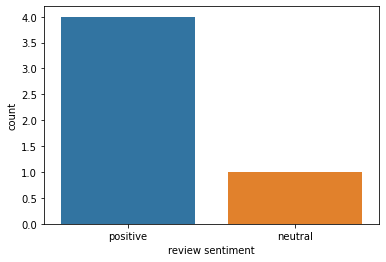

In [67]:
# Plot the distribution
class_names = ['positive','neutral']
ax = sns.countplot(negocio[negocio["user_id"]=="Jz_bxIX2eFIGqOYvbQEaUQ"].sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)

In [70]:
negocio[negocio["user_id"]=="Jz_bxIX2eFIGqOYvbQEaUQ"].sentiment.value_counts()

pos    4
neu    1
Name: sentiment, dtype: int64

In [82]:
negocio[negocio["user_id"]=="Jz_bxIX2eFIGqOYvbQEaUQ"].head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,TOPIC_MOST_FREQ_KEYWORD,sentiment_score,sentiment,NER
23542,Jz_bxIX2eFIGqOYvbQEaUQ,WEcGVKumG60jhS-TTcJl6A,Charlotte Douglas airport is a credit to the ...,0,3Q0QQPnHcJuX1DLCL9G9Cg,0,5,2012-02-25,review,0,charlotte douglas airport credit area place ...,"[airport, charlotte, hudson, plane, place]",0,1097,0_airport_flight_terminal_gate,airport,0.490278,pos,[charlotte douglas airport ]
23619,Jz_bxIX2eFIGqOYvbQEaUQ,k4zT76iwQSMztheHsQKAgw,I love Charlotte Douglas International airport...,0,3Q0QQPnHcJuX1DLCL9G9Cg,0,5,2012-08-18,review,0,love charlotte douglas international airport r...,"[concourse, airport, toilet, lowes, charlotte]",0,1097,0_airport_flight_terminal_gate,airport,0.103712,pos,"[charlotte douglas international airport rate,..."
23749,Jz_bxIX2eFIGqOYvbQEaUQ,a9_al_62QpiuEm3GCrKwnA,We are fortunate that Charlotte Douglas Intern...,0,3Q0QQPnHcJuX1DLCL9G9Cg,0,5,2013-07-01,review,0,fortunate charlotte douglas international airp...,"[charlotte, carolina, airport, north, flight]",0,1097,0_airport_flight_terminal_gate,airport,0.388333,pos,"[charlotte douglas international airport , n..."
23896,Jz_bxIX2eFIGqOYvbQEaUQ,pAlkoW4uQlp3UbxBoIK49g,I would like to thank who ever is responsible ...,0,3Q0QQPnHcJuX1DLCL9G9Cg,0,5,2014-03-30,review,0,like thank responsible plant beautiful plant...,"[plant, plane, airport, area, charlotte]",0,1097,0_airport_flight_terminal_gate,airport,0.304834,pos,"[charlotte douglas airport, american]"
24028,Jz_bxIX2eFIGqOYvbQEaUQ,W0tXb3hGhg-1-ttp8lEvqQ,This message is in reference to Alex P's dero...,0,3Q0QQPnHcJuX1DLCL9G9Cg,0,5,2014-09-02,review,0,message reference alex p derogatory comment ...,"[airport, facility, bathroom, traveler, place]",0,1097,0_airport_flight_terminal_gate,airport,0.000000,neu,[4 decade]


In [94]:
pd.options.display.max_colwidth = 1000
negocio.loc[[23619]].text

23619    I love Charlotte Douglas International airport and rate this place highly.However on visiting the toilets  several times recently the toilet seats were old and cracked, not at all beffiting this show case.They weren't up to standards in my oppinion.\nIf they can afford $multi million for a new concourse then a trip to Lowes is peanuts.
Name: text, dtype: object

In [95]:
pd.options.display.max_colwidth = 1000
negocio.loc[[24028]].text

24028    This message is in reference to Alex P's  derogatory comment regarding the airport facilities especially the bathrooms where you had to 'wade in piss'....Liar liar pants on fire.\nHaving used the airport for over 4 decades I have always found the place to be immaculately kept from one end to the other.\nFuture travelers the airport is a credit to  Charlotte.
Name: text, dtype: object

Most of your comments are positive but we can also see negative comments.

### Person with the most comments:

In [65]:
grouped_df=df.groupby('user_id', as_index=False).agg({"stars": "mean",
                                              "type": "count"}).sort_values(by='type',ascending=False)
grouped_df.columns = ["User ID",'Mean Stars', 'Quantity of reviews']
display(grouped_df.head())

,User ID,Mean Stars,Quantity of reviews
10894,iTmWHtltCtk0Gm55AOxrUA,3.566372,113
11983,nEYPahVwXGD2Pjvgkm7QqQ,3.750000,84
158,-_1ctLaz3jhPYc12hKXsEQ,3.182927,82
12617,q7MrNVt1FE23rwtWmPYWHg,3.927536,69
7311,UD7Y1CqfY6mDmRwIuCf6nA,3.485294,68


[Text(0, 0, 'positive'), Text(0, 0, 'negative'), Text(0, 0, 'neutral')]

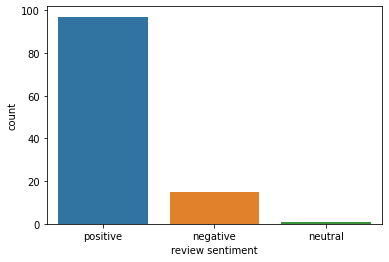

In [68]:
# Plot the distribution
class_names = ['positive',"negative",'neutral']
ax = sns.countplot(df[df["user_id"]=="iTmWHtltCtk0Gm55AOxrUA"].sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)

In [69]:
df[df["user_id"]=="iTmWHtltCtk0Gm55AOxrUA"].sentiment.value_counts()

pos    97
neg    15
neu     1
Name: sentiment, dtype: int64

In [72]:
user = df[df["user_id"]=="iTmWHtltCtk0Gm55AOxrUA"]
grouped_df=user.groupby('business_id', as_index=False).agg({"stars": "mean",
                                              "type": "count"}).sort_values(by='stars',ascending=False)
grouped_df.columns = ["Negocio ID",'Mean Stars', 'Quantity of reviews']
display(grouped_df.head())

,Negocio ID,Mean Stars,Quantity of reviews
32,NUohh--5lVY8pu61uy9oEw,5.0,2
12,7f7P9SCQgBRSMYXbsnDGDQ,5.0,2
38,VJe-sf7dBY6GRGO6TcqzTA,5.0,1
37,V4rrrgVfAVwCI2737bhLIQ,5.0,1
26,J7I85lTCEGr9-qp6AXPUjQ,5.0,2


The restaurants he liked the most.

In [73]:
display(grouped_df.tail())

,Negocio ID,Mean Stars,Quantity of reviews
7,21hqlWgjmNgW4pBZJDuziQ,2.0,2
59,wfCLz9-aeShbPB7CaTY-qQ,2.0,1
63,z4cCguoHdU48pj6sXMIzqg,2.0,1
16,BG4N0V93wml9kaU6YYRxRA,2.0,1
45,c1ixeRdwTvNt6YLew-sSCg,1.0,1


Restaurants he liked the least.

  The customer with the most comments is iTmWHtltltCtk0Gm55AOxrUA, they have made 113 comments and their average rating is 3.566372.
  The highest percentage of their comments are positive, but we can also find some negative ones. 

# Second stage

To avoid bias effects I will start filtering the dataset and analyze more deeply the business data. 

# Filter the dataset elements to be used 

**Analyzed dataset: df_bussines**

In [31]:
df.business_id.value_counts().iloc[:20]

3Q0QQPnHcJuX1DLCL9G9Cg    1068
mpDxBBGywUE6GRRKja3sBA     527
NeUf9FyCCIN4MEseNyqkXQ     387
jTGQUWGIVvL-aY03C5BEmw     292
NTfUFk8GyOLL1uPbEO-pVg     250
XmdTkxKyJd7TuDLoiic1kg     249
vgXE1I7c9ElcfYyZfQiN1Q     243
2X5G4Ujq0s4Wfn4TC7gX0g     243
2SwC8wqpZC4B9iFVTgYT9A     239
rgmptwPbBH1wLpiBHcbIhA     221
2Igiyhi82R8_QaaPplRmCw     213
MQnNtW1lHS-eid3QNUoUIw     212
CChwRoYVXA3QZulS8a6xOQ     211
ePP0Eqz8JKSbtdt2phiB4A     197
ym9QwkmB5ZKTyj7q5huTDw     189
dxCqGkhtXq-9fYEsX7Mf6Q     188
9SPwF-vRgtuHxciFxv5YLA     186
WuCcv_Dyd_1B_1-4jwK7sQ     182
TxKmAsKQjND5vbhBdUSyIA     180
xgK6AAhJ-cYBUCSaLzgTuw     173
Name: business_id, dtype: int64

In [32]:
business = df.groupby('business_id').agg(num_comentarios=('text','count')).sort_values(by='num_comentarios', ascending=False).reset_index() #Genero un data set con los business y la cantidad de comentarios que tiene cada uno
business.head(20) #Visualize first 20 'business_id'

,business_id,num_comentarios
0,3Q0QQPnHcJuX1DLCL9G9Cg,1068
1,mpDxBBGywUE6GRRKja3sBA,527
2,NeUf9FyCCIN4MEseNyqkXQ,387
3,jTGQUWGIVvL-aY03C5BEmw,292
4,NTfUFk8GyOLL1uPbEO-pVg,250
5,XmdTkxKyJd7TuDLoiic1kg,249
6,vgXE1I7c9ElcfYyZfQiN1Q,243
7,2X5G4Ujq0s4Wfn4TC7gX0g,243
8,2SwC8wqpZC4B9iFVTgYT9A,239
9,rgmptwPbBH1wLpiBHcbIhA,221


In [33]:
#I filter the 11 business with more comments, that is, the business with more than 213 comments.
business=business[business.num_comentarios>=213][['business_id']] 

#generate a new index
business.reset_index(drop=True) 

,business_id
0,3Q0QQPnHcJuX1DLCL9G9Cg
1,mpDxBBGywUE6GRRKja3sBA
2,NeUf9FyCCIN4MEseNyqkXQ
3,jTGQUWGIVvL-aY03C5BEmw
4,NTfUFk8GyOLL1uPbEO-pVg
5,XmdTkxKyJd7TuDLoiic1kg
6,vgXE1I7c9ElcfYyZfQiN1Q
7,2X5G4Ujq0s4Wfn4TC7gX0g
8,2SwC8wqpZC4B9iFVTgYT9A
9,rgmptwPbBH1wLpiBHcbIhA


In [34]:
#I generate a data frame with the business selected for analysis and replace it in the original data frame.
df_business=df.loc[df['business_id'].isin(business['business_id'])].reset_index(drop=True) 

#Displays the description of the 'business_id' column in the data frame
df_business.business_id.describe() 

count                       3932
unique                        11
top       3Q0QQPnHcJuX1DLCL9G9Cg
freq                        1068
Name: business_id, dtype: object

At this stage, a dataset was generated with the 11 businesses with the most comments, and the other businesses were filtered. The following is an analysis of the most mentioned topics in the dataset.

# Business Classification Analysis

**Dataset analyzed: df_keywords**.

This dataset 'df_keywords' will be created to classify the businesses. For the subsequent analysis, the dataset that has been used (df_bussines) will be used.

In [ ]:
kw_model = KeyBERT()

In [ ]:
#I define a data frame 'df_keywords' to analyze what is being talked about in each business.
df_keywords = df_business[['business_id','text']] 

#I display the generated data frame
df_keywords 

,business_id,text
0,2SwC8wqpZC4B9iFVTgYT9A,Great stuff here...The cheese plates are great...
1,2SwC8wqpZC4B9iFVTgYT9A,This place used to have a great bar/tapas menu...
2,2SwC8wqpZC4B9iFVTgYT9A,Well it's official Shadyside is becoming my ne...
3,2SwC8wqpZC4B9iFVTgYT9A,As the reviews of Casbah appear to be particul...
4,2SwC8wqpZC4B9iFVTgYT9A,The food here is pretty good. Comparable to a...
...,...,...
3924,3Q0QQPnHcJuX1DLCL9G9Cg,I have flown thru this airport several times o...
3925,3Q0QQPnHcJuX1DLCL9G9Cg,A small airport that needs some improvement. \...
3926,3Q0QQPnHcJuX1DLCL9G9Cg,Very nice airport but a little taken aback by ...
3927,3Q0QQPnHcJuX1DLCL9G9Cg,I wish I could give a zero star rating. The Ch...


***NLP***

We will remove punctuation, stop words from the text, leave the root words and leave the text in lower case. The reason for this step is to avoid that the keyword search takes less time and does not rank words that have no weight or meaning.

In [ ]:
#import spacy to clean and purge the text of words/symbols that do not provide useful information
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
  clean_text = []
  for token in nlp(text):
    if not token.is_stop and not token.is_punct:
      clean_text.append(token.lemma_.lower())

  return " ".join(clean_text)

In [ ]:
#we apply the spacy filter
df_keywords["text"] = df_keywords["text"].apply(clean_text) 

**We analyze the keywords to be able to rank businesses**

In [ ]:
%%time
 #We generate a new column (feature) with the keywords of each comment (review).
df_keywords["KEYWORDS"] = df_keywords.text.apply(lambda x: kw_model.extract_keywords(x, top_n=4, keyphrase_ngram_range=(1,1)))

CPU times: user 25min 32s, sys: 2min 57s, total: 28min 29s
Wall time: 16min 29s


In [ ]:
#We analyze keywords in the generated data frame to understand what each business is talking about.
df_keywords["KEYWORDS"] = df_keywords.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords]) 

In [ ]:
 #visualize the generated data frame
df_keywords.head(10)

,business_id,text,KEYWORDS
0,2SwC8wqpZC4B9iFVTgYT9A,great stuff cheese plate great change awesome ...,"[cheese, menu, plate, waiter]"
1,2SwC8wqpZC4B9iFVTgYT9A,place great bar tapas menu decent selection ha...,"[entree, dinner, appetizer, martini]"
2,2SwC8wqpZC4B9iFVTgYT9A,official shadyside new favorite area restauran...,"[restaurant, dish, dining, shadyside]"
3,2SwC8wqpZC4B9iFVTgYT9A,review casbah appear particularly long winded ...,"[casbah, restaurant, place, menu]"
4,2SwC8wqpZC4B9iFVTgYT9A,food pretty good comparable 3 3.5 star resta...,"[restaurant, pittsburgh, food, lamb]"
5,2SwC8wqpZC4B9iFVTgYT9A,go casbah brunch $ 22 prix fix include alcohol...,"[dinner, meal, brunch, appetizer]"
6,2SwC8wqpZC4B9iFVTgYT9A,moderately price lunch advantage cheese tast...,"[cheese, lunch, sandwich, salad]"
7,2SwC8wqpZC4B9iFVTgYT9A,long day recruit cmu arrange dinner 16 people ...,"[restaurant, meal, cmu, casbah]"
8,2SwC8wqpZC4B9iFVTgYT9A,go casbah dinner totally underwhelme granola b...,"[dinner, brunch, casbah, food]"
9,2SwC8wqpZC4B9iFVTgYT9A,sure place call casbah casbah conjure image ...,"[casbah, place, dish, food]"


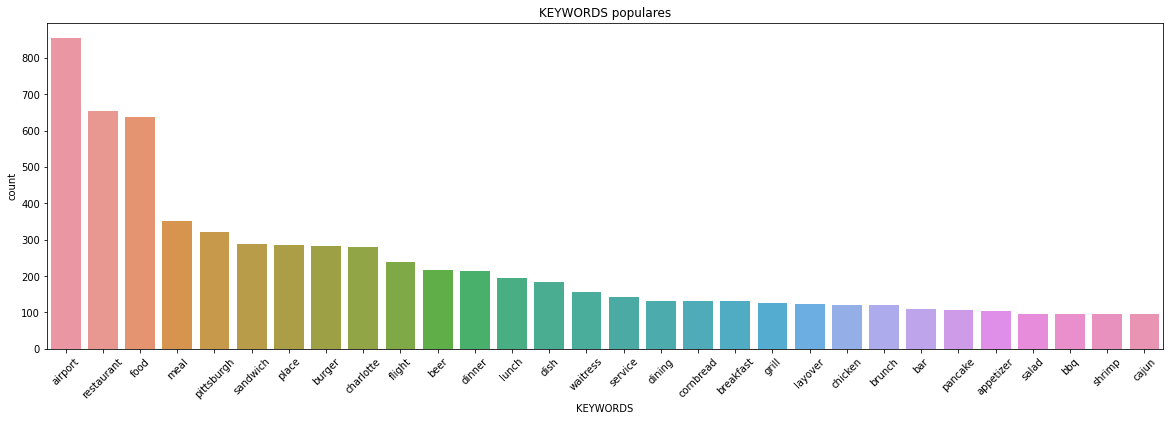

In [ ]:
# we plot the words that appear most often in the data frame

plt.figure(figsize=(20,6))
sns.countplot(x=df_keywords.explode("KEYWORDS").KEYWORDS, 
              order=df_keywords.explode("KEYWORDS").KEYWORDS.value_counts().index[:30])
plt.title("KEYWORDS populares")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_keywords.shape

(3929, 3)

In [ ]:
df_keywords.loc[(df_keywords['business_id'] == '3Q0QQPnHcJuX1DLCL9G9Cg'),'KEYWORDS'] #Identificamos el negocio que habla de los aeropuertos, aunque este negocio tiene la mayor cantidad de comentarios, en unico en su tipo. Los demas negocios son gastronomicos por lo que se decide dropear este negocio

2862         [airport, flight, raleigh, airplane]
2863        [concourse, airport, bbq, restaurant]
2864             [starbucks, airport, rent, room]
2865      [airport, pittsburgh, airline, baggage]
2866        [airport, charlotte, layover, flight]
                          ...                    
3924            [airport, tsa, flight, escalator]
3925                [airport, garage, place, tsa]
3926    [airport, airlines, boarding, restaurant]
3927        [airport, concourse, charlotte, tram]
3928            [airport, place, bathroom, clean]
Name: KEYWORDS, Length: 1067, dtype: object

In [ ]:
df_keywords = df_keywords.drop(df_keywords[df_keywords['business_id']=='3Q0QQPnHcJuX1DLCL9G9Cg'].index) #Dropeamos la fila del aeropuerto ya que no lo identificamos como un negocio gastronomico
df_keywords.shape

(2862, 3)

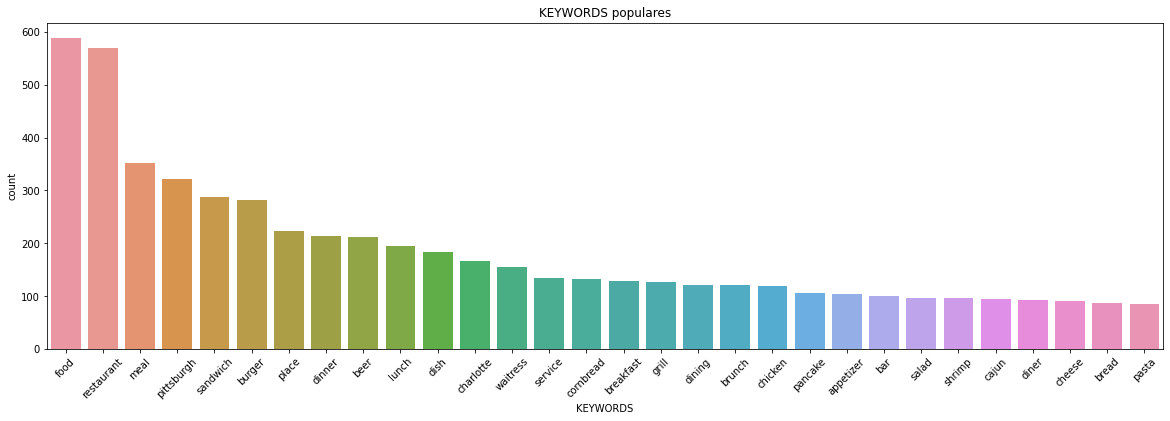

In [ ]:
plt.figure(figsize=(20,6)) #ploteamos nuevamente el grafico y se puede observar que desaparecieron todos los elementos del aeropuerto
sns.countplot(x=df_keywords.explode("KEYWORDS").KEYWORDS, 
              order=df_keywords.explode("KEYWORDS").KEYWORDS.value_counts().index[:30])
plt.title("KEYWORDS populares")
plt.xticks(rotation=45)
plt.show()

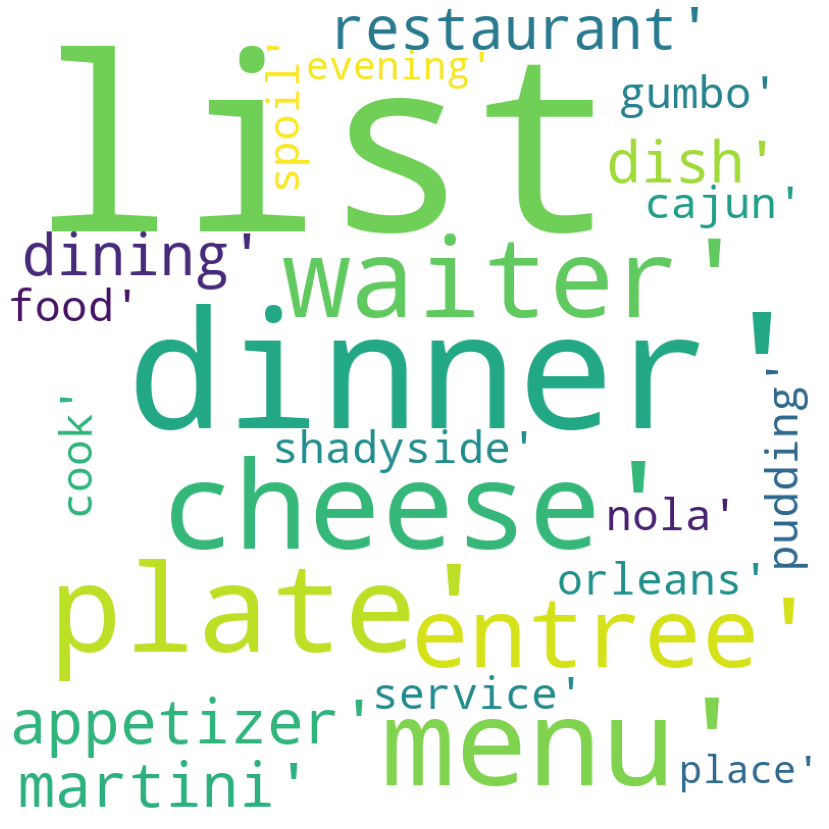

In [ ]:
#Observing the word cloud, it can be seen that only words related to gastronomic establishments appear.
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       ).generate(str(df_keywords['KEYWORDS'].values)) #

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

It was determined that the dataset had a business that was not of the category, so it was decided to eliminate it and use a dataset with a uniform theme. Next, the information of this new dataset will be classified according to the sentiments or stars.

# Classification of comments according to sentiment

* POS = positive

* NEG = Negative

* NEU = Neutral

**Dataset analyzed: df_bussines**

In this instance the airport business is removed and a SENTIMENTS column is added with the classification: POS, NEG or NEU according to the number of stars.

In [35]:
#We define the function get_sentiments. Emotions are sorted according to the stars in the comments.
def get_sentiment(stars): 
  if stars >= 4:
    return "POS"
  
  if stars == 3:
    return "NEU"

  if stars <= 2:
    return "NEG"

In [36]:
#Airport business is eliminated
df_business = df_business.drop(df_business[df_business['business_id']=='3Q0QQPnHcJuX1DLCL9G9Cg'].index)

In [37]:
#we make a new column with the classification of the stars.
df_business["SENTIMENT"] = df_business["stars"].apply(get_sentiment) 

In [38]:
df_business.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,SENTIMENT
0,kdljP-HPIz1SMPZ2-B3NHA,RWU0-370PJUlEzz5AX_u4w,Great stuff here...The cheese plates are great...,0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-04-25,review,0,POS
1,UzqOYLCssQS2FBcDq5HwkA,8rMME0OWVJQ2FeeHG7wUfQ,This place used to have a great bar/tapas menu...,0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2007-07-16,review,1,POS
2,TckShYnQa0eD3WQxdoE3GQ,oulyefOGLSaeYDwwWSuZZg,Well it's official Shadyside is becoming my ne...,0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2008-06-24,review,1,POS
3,5e90VuDs5VFSt99T3PSzBA,6cHA19biumSHrHCqhmPGkQ,As the reviews of Casbah appear to be particul...,0,2SwC8wqpZC4B9iFVTgYT9A,0,5,2008-06-24,review,1,POS
4,GSKY-zWTManYbMGXmRDb3g,5S9RDErw-DXpEtYmMQQwfg,The food here is pretty good. Comparable to a...,0,2SwC8wqpZC4B9iFVTgYT9A,0,4,2008-07-16,review,2,POS


***WordCloud positive words***

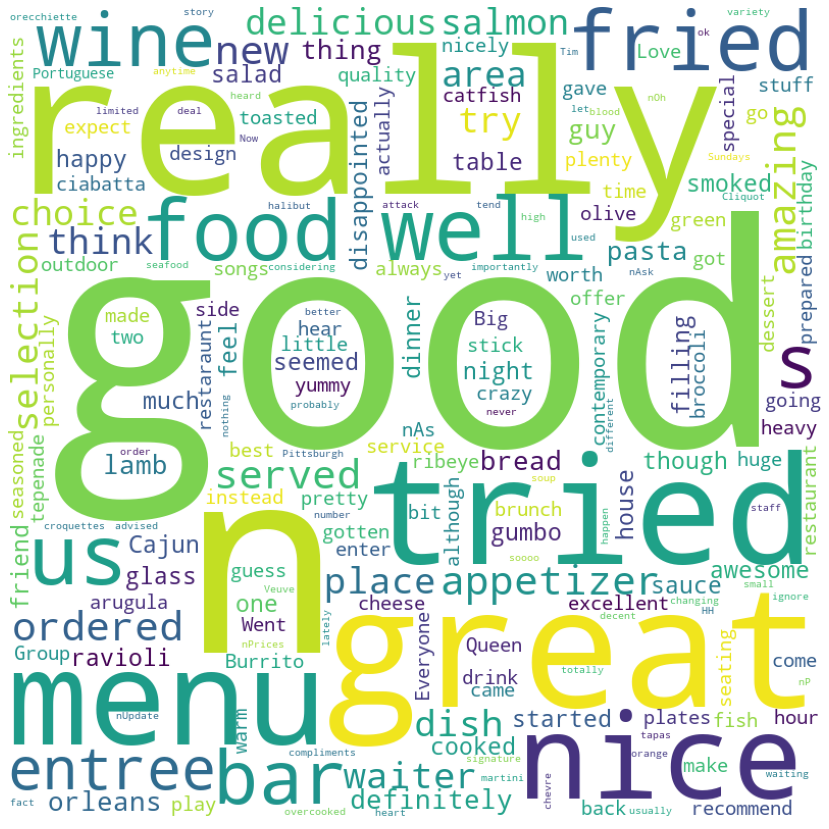

In [ ]:
#A word cloud is plotted with the POSITIVE words of the entire filtered dataset.***WordCloud palabras positivas***
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       ).generate(str(df_business.text[df_business["SENTIMENT"] == 'POS'].values))

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()


***Wordcloud negative words***

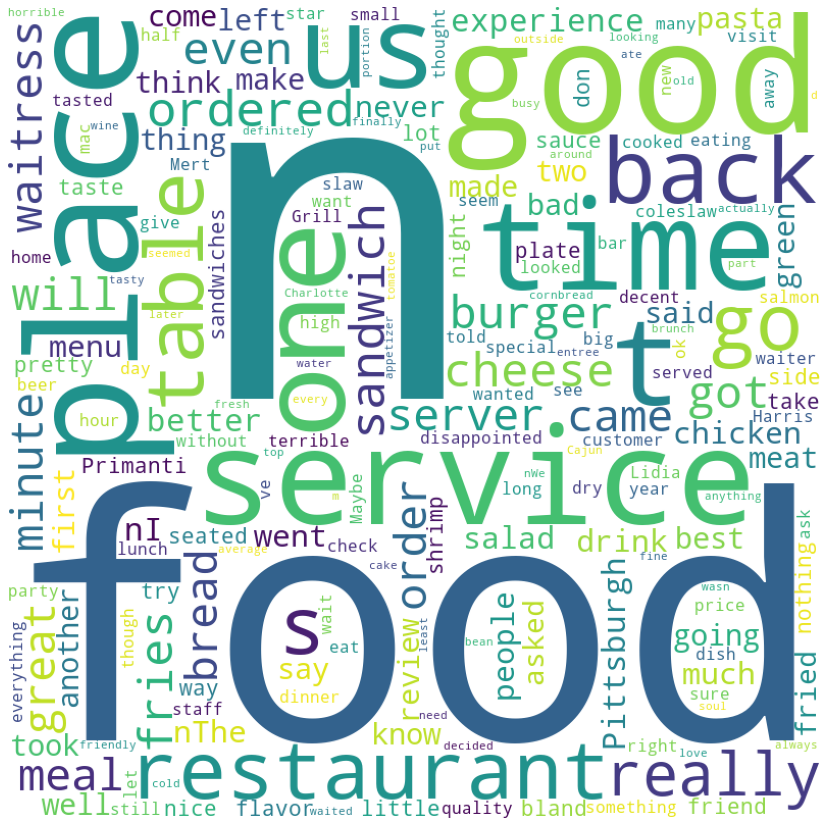

In [ ]:
#A word cloud is plotted with the NEGATIVE words of the entire filtered dataset.
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       ).generate(str(df_business.text[df_business["SENTIMENT"] == 'NEG'].values))

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

***Wordcloud neutral words***

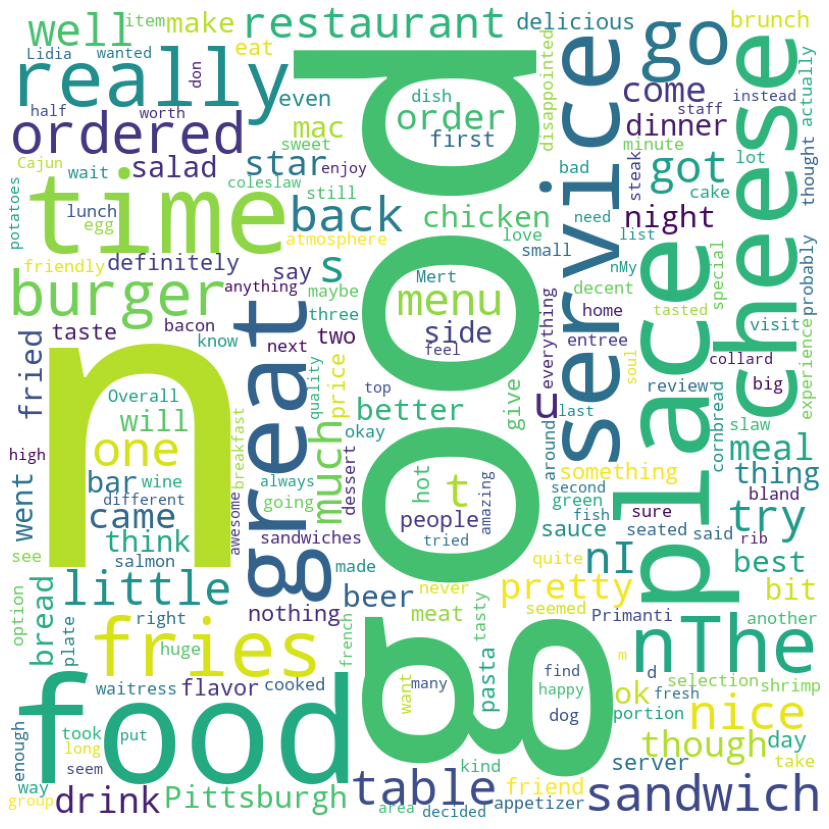

In [ ]:
#A word cloud is plotted with the NEUTRAL words of the entire filtered dataset.
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       ).generate(str(df_business.text[df_business["SENTIMENT"] == 'NEU'].values))

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In this stage, the words most used in the POSITIVE, NEGATIVE and NEUTRAL comments are visualized in WordsCloud. The objective is to detect the most used words in the positive and negative comments to understand how to improve the service of a restaurant.

# DataSet pre-processing

*The 5 business with the most reviews are selected to detect which words have the most positive and negative comments*

In [39]:
#5 business with the highest number of reviews are displayed
df_business.business_id.value_counts().sort_values(ascending=False).iloc[:5] 

mpDxBBGywUE6GRRKja3sBA    527
NeUf9FyCCIN4MEseNyqkXQ    387
jTGQUWGIVvL-aY03C5BEmw    292
NTfUFk8GyOLL1uPbEO-pVg    250
XmdTkxKyJd7TuDLoiic1kg    249
Name: business_id, dtype: int64

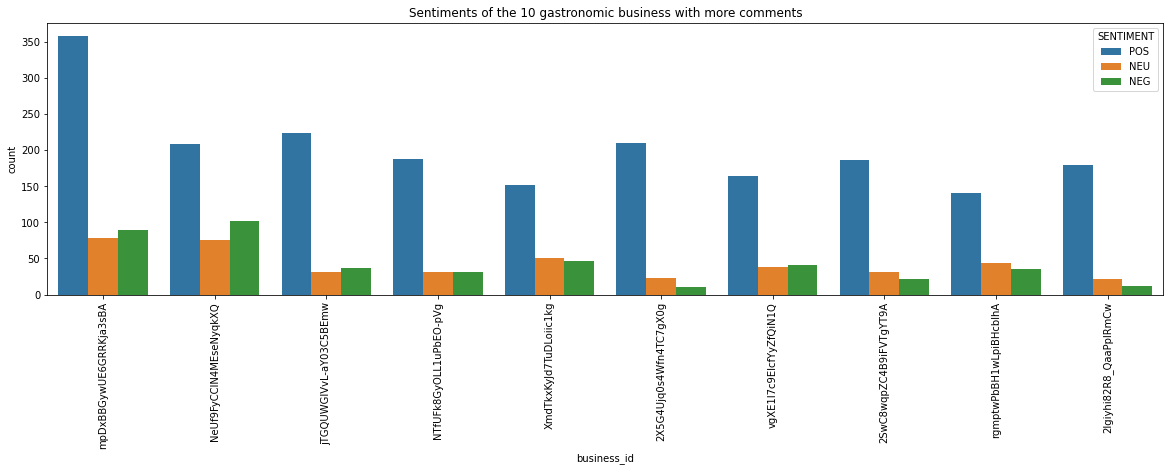

In [40]:
#10 gastronomic business with more comments are plotted
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=df_business['business_id'], hue=df_business.SENTIMENT, order=df_business['business_id'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title(f'Sentiments of the 10 gastronomic business with more comments')
plt.show()

**We clean the DataSets and extract the Keywords**.

In [49]:
df_business['year'] = df_business.date.dt.year

In [ ]:
 #We apply the clean_text function to remove stopwords, punctuation, leave root words and lowercase words.
df_business["text"] = df_business["text"].apply(clean_text)

In [ ]:
#Se genera una nueva columna con las palabras claves de cada text
%%time
df_business["KEYWORDS"] = df_business.text.apply(lambda x: kw_model.extract_keywords(x, top_n=4, keyphrase_ngram_range=(1,1))) #Se setea extraer 4 palabras claves 

CPU times: user 19min 30s, sys: 2min 17s, total: 21min 48s
Wall time: 12min 21s


In [ ]:
df_business["KEYWORDS"] = df_business.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

We replace the business_id by the respective name of the store as noted in comments

In [ ]:
#Se reemplaza los codigos de los business por el del negocios según se exploró en los comentarios
df_business = df_business.replace("mpDxBBGywUE6GRRKja3sBA",'Merts')
df_business= df_business.replace('NeUf9FyCCIN4MEseNyqkXQ','Primanti Bros')
df_business = df_business.replace('jTGQUWGIVvL-aY03C5BEmw','Cajun Queen')
df_business = df_business.replace('NTfUFk8GyOLL1uPbEO-pVg','Mimosa Grill')
df_business = df_business.replace('XmdTkxKyJd7TuDLoiic1kg','Lidia')

We apply a mask to analyze each business separately

In [ ]:
#Se aplica una mascara para analizar a posterior cada palabra clave según un business en particular
Bs_1 = df_business[df_business['business_id']=='Merts']
Bs_2 = df_business[df_business['business_id']=='Primanti Bros']
Bs_3 = df_business[df_business['business_id']=='Cajun Queen']
Bs_4 = df_business[df_business['business_id']=='Mimosa Grill']
Bs_5 = df_business[df_business['business_id']=='Lidia']

In [ ]:
#Se concatenan todos los dataset anteriores en un solo dataset
df_business = pd.concat([Bs_1,Bs_2,Bs_3,Bs_4,Bs_5])

In [ ]:
#Se muestran las 5 filas de ejemplo
df_business.sample(5)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,SENTIMENT,year,KEYWORDS
1251,ojT9INotDCVJnGhZINceSw,x2NM_F6jyNRyaefOSCqnpA,classy wonderful establishment visit mother 60...,0,Lidia,0,5,2014-07-03,review,0,POS,2014,"[waiter, visit, cheno, establishment]"
2407,opFtIM73_kXjeDabfPjWMw,Bviw8Bb0S-QIAM-TPmcyEg,enjoy brunch mimosa grill lot yummy selectio...,0,Mimosa Grill,0,4,2012-08-19,review,0,POS,2012,"[brunch, mimosa, salmon, breakfast]"
782,USjpUq9nDx7qTMA1WfC74g,GKHjgCHeQIkEf2XOcmvpZA,exactly year later 2nd primanti bros sandwich ...,1,Primanti Bros,0,5,2011-02-04,review,1,POS,2011,"[pittsburgh, sandwich, primanti, place]"
1895,MQct-qtQ9_AWt5X7TjtsEA,bq0hXJqOwlqW4d9EVtd70A,wow glad find place take mom dad taste soul fo...,0,Merts,0,4,2011-07-16,review,3,POS,2011,"[dinner, food, cornbread, bbq]"
2270,f_wbRY-Pe2ZP6ngy_a_aMQ,Ap46PDkiJGH2Dr48wHY93w,wish worth 20 25 min wait hostess rude sit gro...,0,Merts,0,3,2015-08-23,review,0,NEU,2015,"[wish, hostess, wedding, anniversary]"


**Keyword analysis by business**.

*Merts*

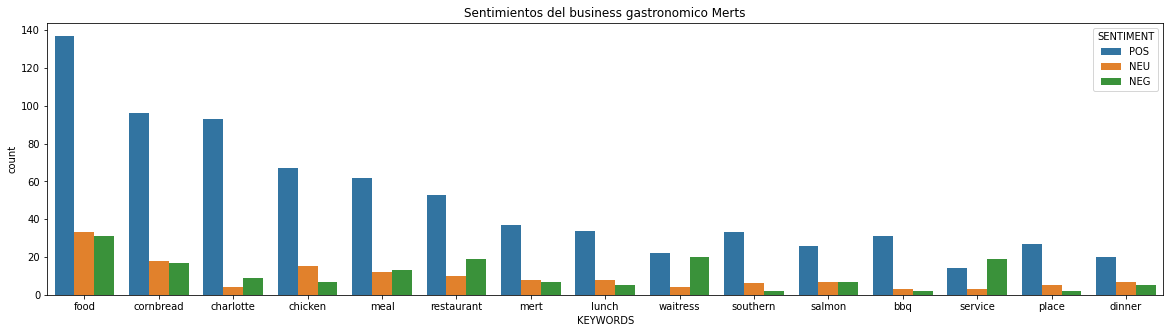

In [ ]:
#The keywords are plotted according to the sentiments that the comment had for the business Mert.
#The comment has 4 keywords and one sentiment, the explode function is used to disaggregate the row of a row with 4 keywords into 4 rows with one keyword. 
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=Bs_1.explode("KEYWORDS").KEYWORDS, hue=Bs_1.explode("KEYWORDS").SENTIMENT,order=Bs_1.explode("KEYWORDS").KEYWORDS.value_counts().index[:15])
plt.xticks(rotation=0)
plt.title(f'Sentiments of Merts gastronomic business')
plt.show()

*Primanti Bros*

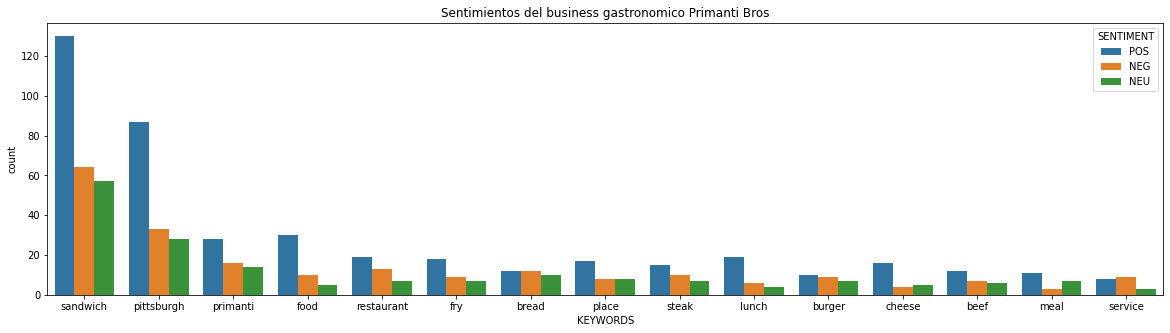

In [ ]:
#The keywords are plotted according to the feelings that the comment had for the business Primanti Bros.
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=Bs_2.explode("KEYWORDS").KEYWORDS, hue=Bs_2.explode("KEYWORDS").SENTIMENT,order=Bs_2.explode("KEYWORDS").KEYWORDS.value_counts().index[:15])
plt.xticks(rotation=0)
plt.title(f'Sentiments of the gastronomic business Primanti Bros.')
plt.show()

*Cajun Queen*

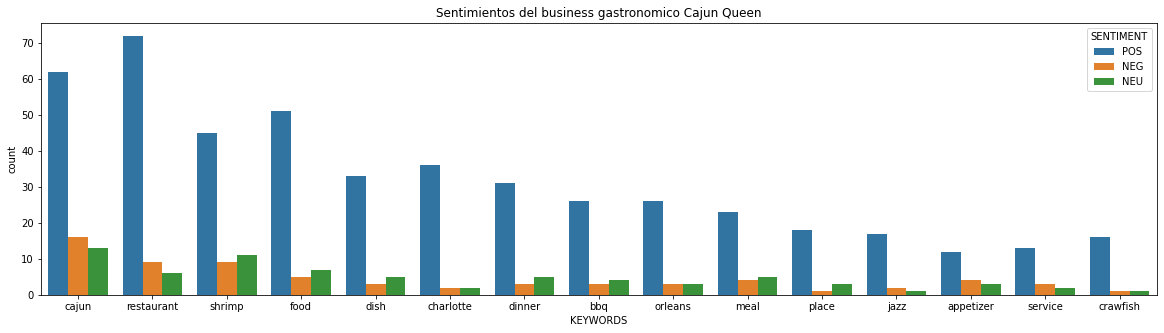

In [ ]:
#The keywords are plotted according to the feelings that the comment had for the business Cajun Queen.
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=Bs_3.explode("KEYWORDS").KEYWORDS, hue=Bs_3.explode("KEYWORDS").SENTIMENT,order=Bs_3.explode("KEYWORDS").KEYWORDS.value_counts().index[:15])
plt.xticks(rotation=0)
plt.title(f'Sentiments of the gastronomic business Cajun Queen')
plt.show()

*Mimosa Grill*

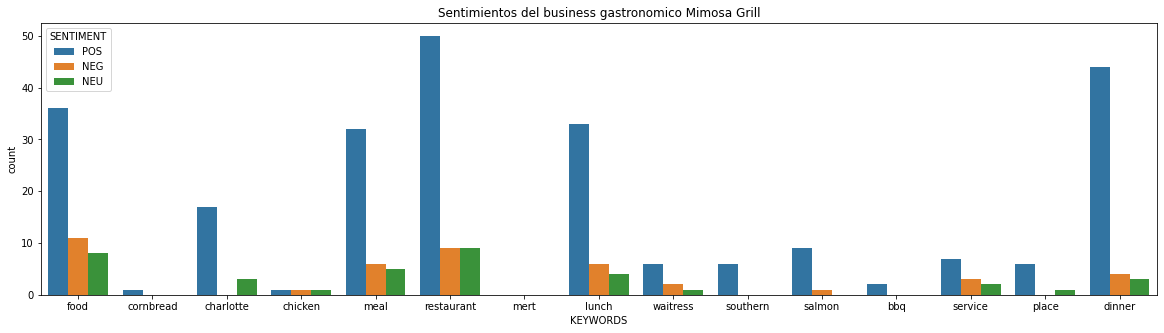

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=Bs_4.explode("KEYWORDS").KEYWORDS, hue=Bs_4.explode("KEYWORDS").SENTIMENT,order=Bs_1.explode("KEYWORDS").KEYWORDS.value_counts().index[:15])
plt.xticks(rotation=0)
plt.title(f'Sentiments of the gastronomic business Mimosa Grill')
plt.show()

*Lidia*

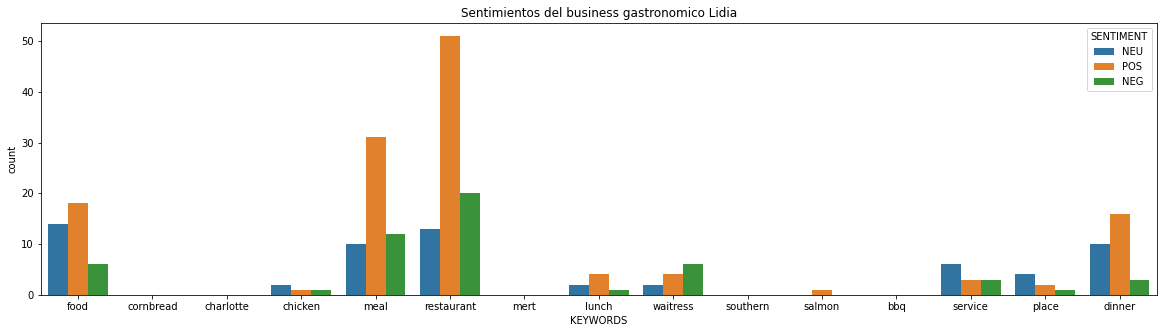

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=Bs_5.explode("KEYWORDS").KEYWORDS, hue=Bs_5.explode("KEYWORDS").SENTIMENT,order=Bs_1.explode("KEYWORDS").KEYWORDS.value_counts().index[:15])
plt.xticks(rotation=0)
plt.title(f'Sentiments of the gastronomic business Lidia')
plt.show()

At this point it was determined that people made more positive and negative comments about the food, the service and the place. The following is a more in-depth analysis of these key words to understand what deficiencies exist and what improvements can be made.

# Analysis of keywords in busness

FOOD

In [ ]:
#A new data set is created to show the feelings of each business according to the food.
food = df_business.explode("KEYWORDS")[df_business.explode("KEYWORDS")['KEYWORDS']=='food']

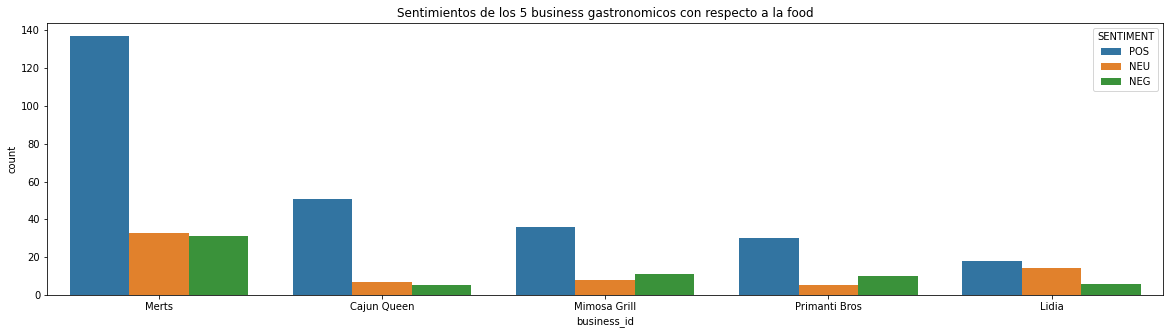

In [ ]:
#Feelings of each business are graphed according to the food.
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=food.business_id, hue=food.SENTIMENT, order=food.business_id.value_counts().index[:15])
plt.xticks(rotation=0)
plt.title(f'Feelings of the 5 gastronomic business with respect to food')
plt.show()

PLACE

In [ ]:
place = df_business.explode("KEYWORDS")[df_business.explode("KEYWORDS")['KEYWORDS']=='place']

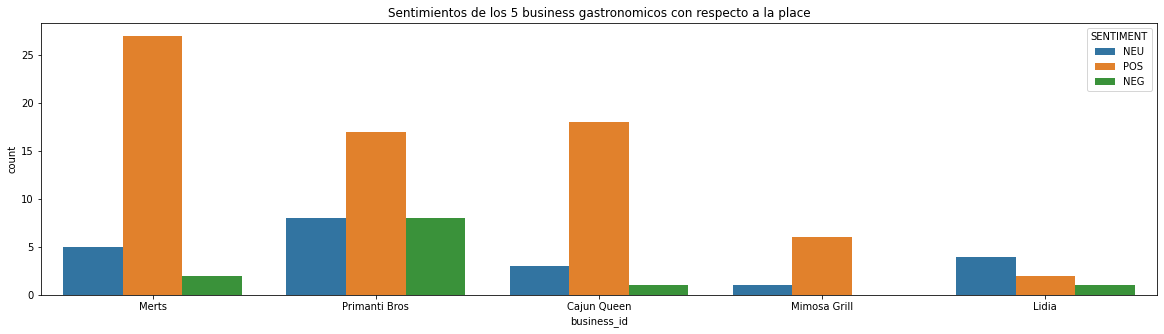

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=place.business_id, hue=place.SENTIMENT, order=place.business_id.value_counts().index[:15])
plt.xticks(rotation=0)
plt.title(f'Sentiment of the 5 gastronomic business with respect to place')
plt.show()

SERVICE

In [ ]:
service = df_business.explode("KEYWORDS")[df_business.explode("KEYWORDS")['KEYWORDS']=='service']

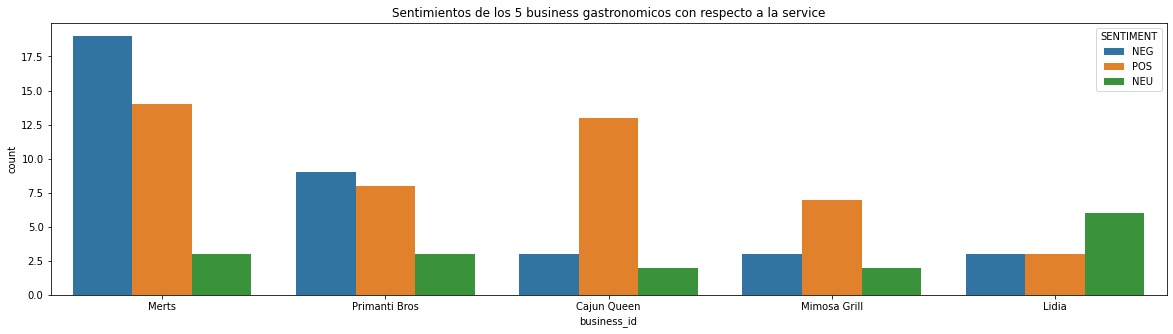

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=service.business_id, hue=service.SENTIMENT, order=service.business_id.value_counts().index[:15])
plt.xticks(rotation=0)
plt.title(f'Sentiment of the 5 gastronomic business with respect to service')
plt.show()

In this section we analyzed the relationship between food, service and place for each business. It was detected that there is a relationship between a good food score and bad service (we understand that this is due to the existence of high demand and little place). On the other hand, having good food but a bad place affects reputation and consequently increases negative feelings.

# Detailed analysis of the most relevant business: **Merts**.

Temporal analysis of feelings

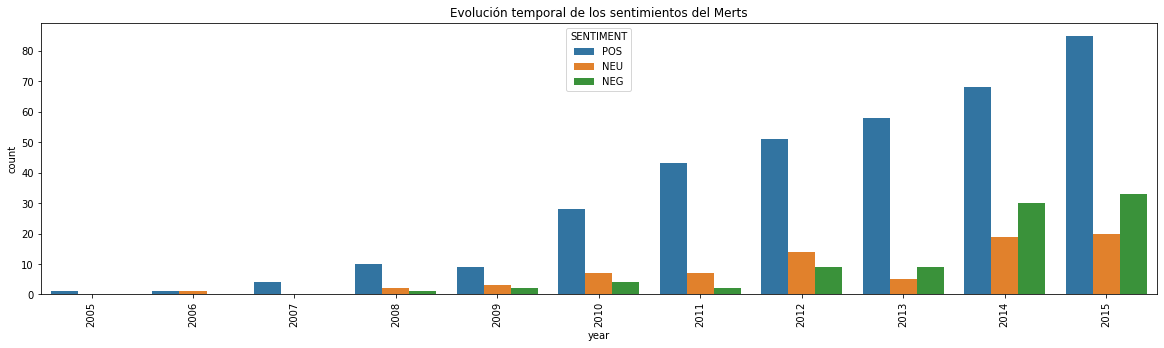

In [ ]:
#Mert business sentiments are graphed over time.
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=Bs_1.year, hue=Bs_1.SENTIMENT)
plt.xticks(rotation=90)
plt.title(f'Temporal evolution of Merts sentiment')
plt.show()

*FOOD*

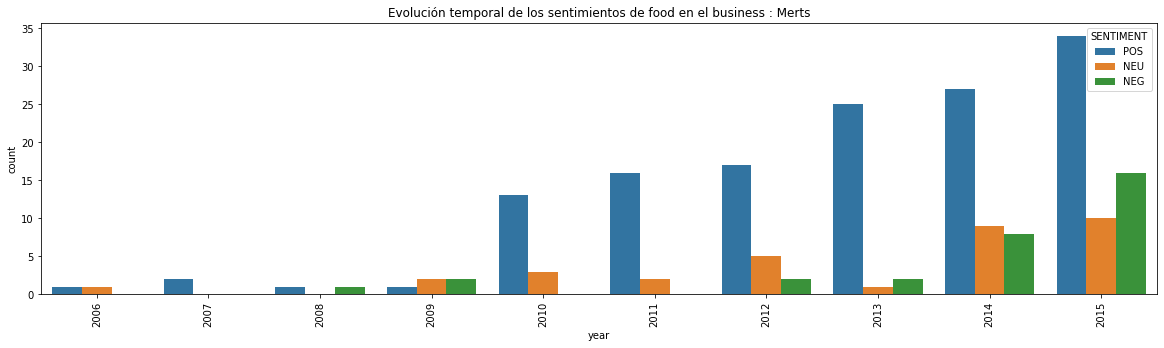

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=food[food['business_id']=='Merts'].year, hue=food.SENTIMENT)
plt.xticks(rotation=90)
plt.title(f'Temporal evolution of food sentiment in the business : Merts')
plt.show()

*SERVICIO*

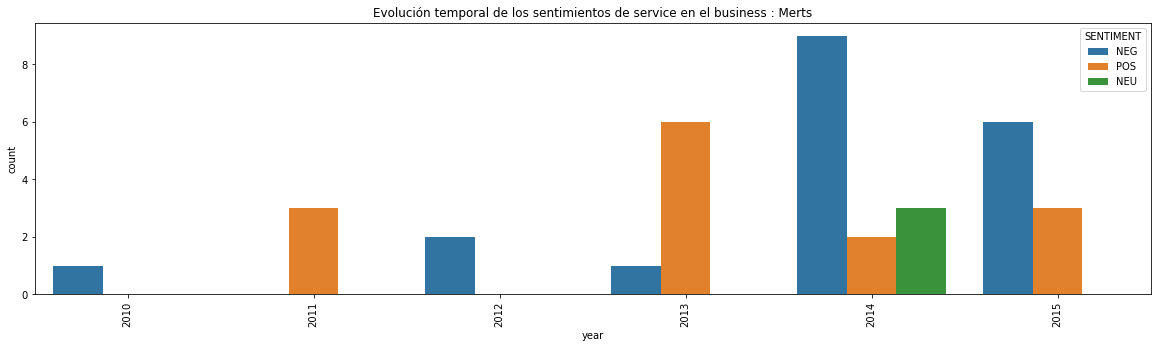

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=service[service['business_id']=='Merts'].year, hue=service.SENTIMENT)
plt.xticks(rotation=90)
plt.title(f'Temporal evolution of service sentiment in business : Merts')
plt.show()

*LUGAR*

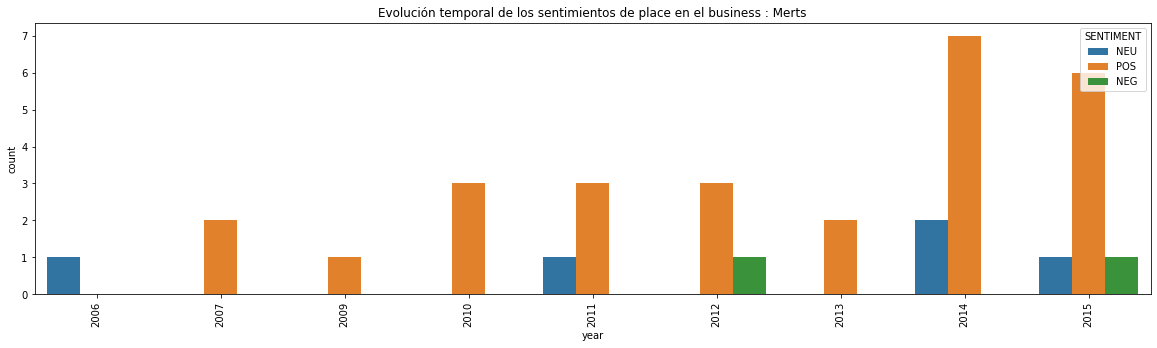

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x=place[place['business_id']=='Merts'].year, hue=place.SENTIMENT)
plt.xticks(rotation=90)
plt.title(f'Temporal evolution of the feelings of place in business : Merts')
plt.show()

Comments with more votes.useful

In [ ]:
df_business.loc[(df_business["business_id"] == 'Merts'),'votes.useful'].value_counts()

0    343
1    118
2     34
3     16
5      7
4      3
7      3
6      2
Name: votes.useful, dtype: int64

In [ ]:
Bs_1.loc[(Bs_1["votes.useful"] == 7),'text'].value_counts()

live charlotte year restaurant time find perfect bbq joint dream happen quintessential place good old southern cooking particular fried chicken thing past find merts \n\n tell walk inside go great southern food experience interior restaurant colorful eye catch art decor scream southern interior capacity able snag table outside outdoor area mixed bag near crowded inside table charlotte pedestrian walk outdoor area bit disruptive eat nice meal people constantly walk right table \n\n fan beer list merts carry draft stick unsweet tea place order server come small loaf cornbread cornbread spot gritty little sweet extremely crumbly tell fresh oven super awesome \n\n dinner order beef rib leg quarter fry chicken combo crazy rib bit tough chunk bone keep flake enjoy sauce sweet tangy sauce vinegary chicken bomb search fried chicken disappoint time far confident merts good fried chicken price jump battered skin light crisp greasy interior moist juicy expect fried chicken heaven scoff chicken wi

**Comment (7 votes.useful):** **
Mert's is one of those must-visit places in Charlotte that is consistently packed, **always packed** and a must-visit if you're a regular foodie in town. Even if you're in town for an extended stay, Mert's should be on your radar in the first few days. \While I'm not a big fan of soul/comfort food, **the fried chicken, fried catfish, mac and cheese and other sides have sung beautifully on my many visits**. One thing that stands out most often and consistently appeals to my palate is the lemonade. My goodness, it's so good....

**Comment (7 votes.useful):** **
First time here....This is a small southern style food place. My expectations were high seeing that Guy Fieri "was here". And one of **the waiters didn't want to seat us in his area because he didn't want to serve more tables on his side**. Well, thanks Pal. The restaurant really **isn't that big**. Anything...**We ordered and our waitress was kind of rude**. I guess she was overwhelmed and tired that day that she wanted to close the restaurant already. \I wanted to order the ribs with macaroni and cheese and green beans. But the waitress informed us there was no more. ...

Based on the positive and negative reviews of the business Merts over time, the relationship between service and food was confirmed. In addition, the comments with more votes.useful of this business were analyzed and the analysis was confirmed.

# BERTopic

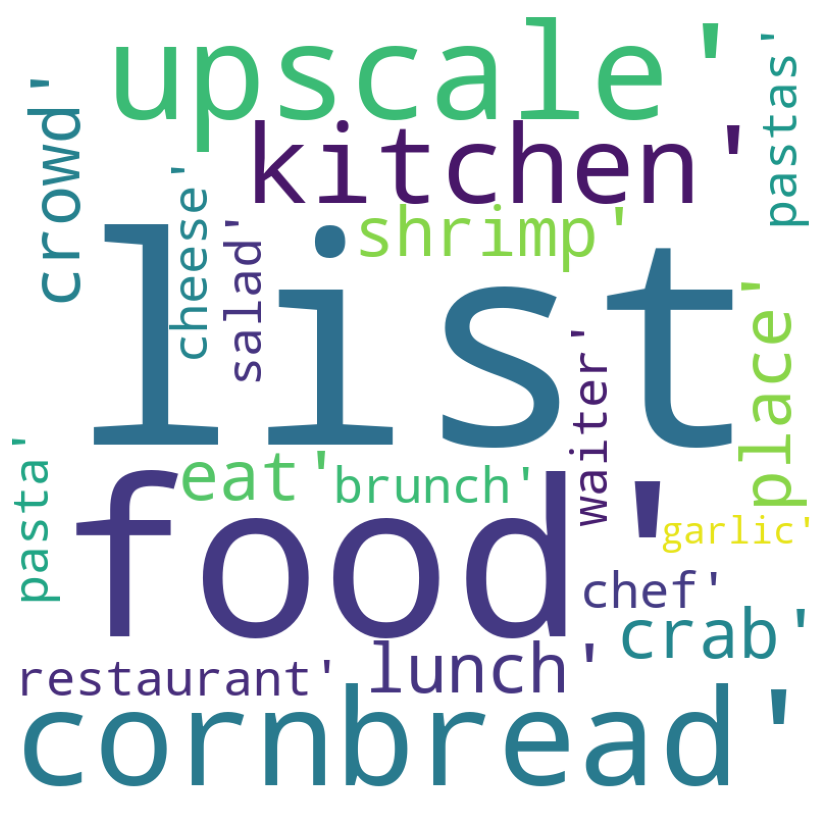

In [ ]:
#BERtopic is applied to determine the most named topics of the businesses studied.
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       ).generate(str(df_business['KEYWORDS'].values))
plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
#apply Betopic
%%time
topic_model = BERTopic(calculate_probabilities=True, nr_topics=10, verbose=True) #ponemos un máximo de 20 tópicos
topics, probs = topic_model.fit_transform(df_top_5["text"].values)

Batches:   0%|          | 0/54 [00:00<?, ?it/s]

2022-09-22 21:13:24,983 - BERTopic - Transformed documents to Embeddings
2022-09-22 21:13:37,251 - BERTopic - Reduced dimensionality
2022-09-22 21:13:37,368 - BERTopic - Clustered reduced embeddings
2022-09-22 21:13:37,696 - BERTopic - Reduced number of topics from 4 to 4


CPU times: user 1min 40s, sys: 1.88 s, total: 1min 41s
Wall time: 1min 19s


In [ ]:
#show information generated by BERTopic
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name
0,-1,2,-1_district_strip_dieter_supermodel
1,0,347,0_sandwich_fry_pittsburgh_primanti
2,1,46,1_mimosa_grill_lunch_great
3,2,1308,2_good_food_great_place


In [ ]:
#Sorts the information generated by BERTopic according to frequency.
topic_model.get_topic_freq()

,Topic,Count
0,2,1308
1,0,347
2,1,46
3,-1,2


In [ ]:
#Indicates the frequency (%) of the topical 0 
topic_model.get_topic(0)

[('sandwich', 0.15318298437319308),
 ('fry', 0.0747186451892303),
 ('pittsburgh', 0.0729971593709377),
 ('primanti', 0.06356639756673912),
 ('place', 0.04945308001701593),
 ('slaw', 0.04924043282939831),
 ('good', 0.04117264828013304),
 ('coleslaw', 0.037337116672690795),
 ('like', 0.03479358451776265),
 ('order', 0.03471233438160284)]

In [ ]:
#Indicates the frequency (%) of topical 1
topic_model.get_topic(1)

[('mimosa', 0.13657834852273026),
 ('grill', 0.0740802891274333),
 ('lunch', 0.04739633796605999),
 ('great', 0.04670066950693045),
 ('menu', 0.041155645179616146),
 ('brunch', 0.04057689427620164),
 ('food', 0.04011072099173614),
 ('dinner', 0.03792302719687667),
 ('restaurant', 0.03684685791541818),
 ('good', 0.03440364370672235)]

Visualize_barchart displays selected terms to themes by creating bar charts from c-TF-IDF scores. 

In [ ]:
#Graph (in bar chart) the frequency (%) of each topic 
topic_model.visualize_barchart()

The bar chart shows by default the most prominent terms. The bars indicate the total frequency of the term in the whole dataset. We can identify the most informative or useful words for identifying topics in the entire text collection. Higher prominence values indicate that a word is more useful for identifying a specific topic.

It is confirmed that the most talked about topics in the comments were food, service and place.